<a href="https://colab.research.google.com/github/pratimdas/AzureTRE/blob/main/Chapter_2_Recipe_12_(Column_Frequency_Counts).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Column Frequency Counts

Using the local copy of the Dirty Retail Store Sales dataset in /content/sample_data/retail_store_sales.csv

**Purpose:** Profile the distribution of values in each column—spotting uncommon categories, typos, and guiding grouping or encoding decisions.

**Step 1:** Import libraries and load the dataset

In [ ]:
# Step 1: Import libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Load raw data (or use df_clean from Recipe 11 if available)
filepath = '/content/sample_data/retail_store_sales.csv'
try:
    df = pd.read_csv(filepath, low_memory=False)
    print(f"✅ Loaded DataFrame from {filepath}: shape = {df.shape}")
except FileNotFoundError:
    raise FileNotFoundError(f"File not found: {filepath}")

# If you ran Recipe 11 and have df_clean, use it:
df_freq = globals().get('df_clean', df)
print(f"🔍 Profiling value counts on DataFrame with shape: {df_freq.shape}")


✅ Loaded DataFrame from /content/sample_data/retail_store_sales.csv: shape = (12575, 11)
🔍 Profiling value counts on DataFrame with shape: (12575, 11)


# Top N frequencies

In [ ]:
# Step 2: Define a helper function to show top N frequencies
def show_value_counts(series, top_n=10, normalize=False):
    """
    Display the top N value counts for a pandas Series.
    - normalize=True shows proportions instead of raw counts.
    """
    counts = series.value_counts(dropna=False, normalize=normalize)
    display(counts.head(top_n))
    return counts


# Display frequencies

In [ ]:
# Step 3: Loop through each column and display frequencies
print("\n" + "="*60)
print("RECIPE 12: COLUMN FREQUENCY COUNTS")
print("="*60)

for col in df_freq.columns:
    print(f"\n🔸 Column: {col}")
    is_cat = df_freq[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_freq[col])
    # For categorical columns, show percentages; otherwise raw counts
    show_value_counts(df_freq[col], top_n=10, normalize=is_cat)



RECIPE 12: COLUMN FREQUENCY COUNTS

🔸 Column: Transaction ID


,proportion
Transaction ID,
TXN_2407494,0.00008
TXN_6867343,0.00008
TXN_3731986,0.00008
TXN_9303719,0.00008
TXN_9458126,0.00008
TXN_4575373,0.00008
TXN_7482416,0.00008
TXN_3652209,0.00008
TXN_1372952,0.00008



🔸 Column: Customer ID


,proportion
Customer ID,
CUST_05,0.043260
CUST_24,0.043181
CUST_13,0.042465
CUST_08,0.042386
CUST_09,0.041272
CUST_15,0.041272
CUST_16,0.040954
CUST_23,0.040795
CUST_20,0.040318



🔸 Column: Category


,proportion
Category,
Electric household essentials,0.126521
Furniture,0.126521
Food,0.126282
Milk Products,0.125964
Butchers,0.124692
Beverages,0.124612
Computers and electric accessories,0.123897
Patisserie,0.121511



🔸 Column: Item


,proportion
Item,
NaN,0.096461
Item_2_BEV,0.010020
Item_25_FUR,0.008986
Item_11_FUR,0.008748
Item_16_MILK,0.008668
Item_1_MILK,0.008668
Item_5_FUR,0.008509
Item_20_BUT,0.008509
Item_14_FOOD,0.008429



🔸 Column: Price Per Unit


/tmp/ipython-input-4-2919041037.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_cat = df_freq[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_freq[col])


,count
Price Per Unit,
33.5,678
20.0,634
21.5,630
NaN,609
41.0,593
29.0,554
15.5,554
38.0,542
6.5,527



🔸 Column: Quantity


,count
Quantity,
10.0,1232
5.0,1228
7.0,1227
8.0,1226
3.0,1224
6.0,1220
2.0,1164
4.0,1155
9.0,1148



🔸 Column: Total Spent


,count
Total Spent,
NaN,604
40.0,140
80.0,124
25.0,122
140.0,118
20.0,108
55.0,107
160.0,107
100.0,102



🔸 Column: Payment Method


,proportion
Payment Method,
Cash,0.342744
Digital Wallet,0.329543
Credit Card,0.327714



🔸 Column: Location


,proportion
Location,
Online,0.505288
In-store,0.494712



🔸 Column: Transaction Date


,proportion
Transaction Date,
2022-05-30,0.002068
2023-07-17,0.001909
2024-03-16,0.001750
2023-06-12,0.001750
2022-01-23,0.001670
2022-04-14,0.001670
2024-09-29,0.001670
2023-06-14,0.001670
2023-12-25,0.001670



🔸 Column: Discount Applied


,proportion
Discount Applied,
True,0.335507
NaN,0.333917
False,0.330577


# Visualize the top 5 categories

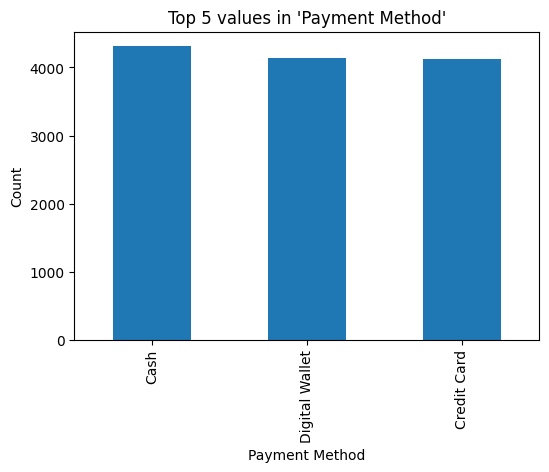

In [ ]:
# Step 4 (Optional): Visualize the top 5 categories for a specific column
col = 'Payment Method'  # adjust as needed
top5 = df_freq[col].value_counts().nlargest(5)
top5.plot.bar(figsize=(6,4))
plt.title(f"Top 5 values in '{col}'")
plt.ylabel("Count")
plt.xlabel(col)
plt.show()


# Recipe 13: Reading Mixed-Encoding CSVs

**Purpose:**
Robustly load CSV files when you don’t know their encoding or delimiter—detecting and handling BOMs, alternate encodings (UTF-16, Latin-1), and non-comma separators.

**Prerequisites:**

Colab notebook with /content/sample_data/retail_store_sales.csv present

pandas and chardet installed

In [ ]:
# Install chardet if needed
!pip install --upgrade chardet pandas

# Step 1: Detect file encoding

import chardet

filepath = '/content/sample_data/retail_store_sales.csv'

# Read a sample of bytes to guess encoding
with open(filepath, 'rb') as f:
    raw = f.read(10_000)

detected = chardet.detect(raw)
encoding = detected['encoding']
confidence = detected['confidence']

print(f"🔍 Detected encoding: {encoding} (confidence: {confidence:.2f})")


🔍 Detected encoding: ascii (confidence: 1.00)


In [ ]:
# Step 2: Read CSV with detected encoding
import pandas as pd

# Use the detected encoding; fall back to 'utf-8' if detection failed
enc = encoding if encoding else 'utf-8'

# Try reading with the detected encoding
df = pd.read_csv(filepath, encoding=enc, engine='python')
print(f"✅ Loaded DataFrame with encoding={enc}: shape = {df.shape}")


✅ Loaded DataFrame with encoding=ascii: shape = (12575, 11)


In [ ]:
# Step 3: Handle alternate delimiters
# Sometimes files use semicolons, tabs, or pipes. Let's auto-detect delimiters:
# Read the first few lines and count delimiter occurrences.
with open(filepath, 'r', encoding=enc) as f:
    sample = "".join([next(f) for _ in range(5)])

# Common candidates
delims = [',', ';', '\t', '|']
scores = {d: sample.count(d) for d in delims}
best_delim = max(scores, key=scores.get)
print(f"🔍 Detected delimiter: '{best_delim}' (counts: {scores})")

# Reload with correct delimiter
df = pd.read_csv(filepath, encoding=enc, sep=best_delim, engine='python')
print(f"✅ Reloaded with sep='{best_delim}': shape = {df.shape}")


🔍 Detected delimiter: ',' (counts: {',': 50, ';': 0, '\t': 0, '|': 0})
✅ Reloaded with sep=',': shape = (12575, 11)


In [ ]:
# Step 4: Skip byte-order mark (BOM) if present

# If the first column name starts with a BOM, strip it
cols = df.columns.tolist()
if cols and cols[0].startswith('\ufeff'):
    cleaned = [c.lstrip('\ufeff') for c in cols]
    df.columns = cleaned
    print("✅ Stripped BOM from column names")
else:
    print("ℹ️  No BOM found in column names")


ℹ️  No BOM found in column names


In [ ]:
# Step 5: Preview and verify

# Quick sanity check
print("\nFirst 3 rows:")
print(df.head(3))

print("\nColumn dtypes:")
print(df.dtypes)



First 3 rows:
  Transaction ID Customer ID       Category          Item  Price Per Unit  \
0    TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5   
1    TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0   
2    TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5   

   Quantity  Total Spent  Payment Method Location Transaction Date  \
0      10.0        185.0  Digital Wallet   Online       2024-04-08   
1       9.0        261.0  Digital Wallet   Online       2023-07-23   
2       2.0         43.0     Credit Card   Online       2022-10-05   

  Discount Applied  
0             True  
1             True  
2            False  

Column dtypes:
Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applie